# Customer Churn

---

## Contents

- <a href="#import">Import Libraries</a><br>
- <a href="#data">Import Data</a><br>
- <a href="#3">Creating 3-way Holdout data sets</a><br>
- <a href="#eda">Exploratory Data Analysis</a><br>
- <a href="#prep">Data Preprocessing</a><br>
- <a href="#sel">Feature Selection</a><br>
- <a href="#engg">Feature Engineering</a><br>
- <a href="#hyp">Hyperparameter Tuning</a><br>

---

<p><a name="import"></a></p>
 
### Import Modules

In [152]:
# Standard Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Compose
from sklearn.compose import make_column_transformer

# Classes for inheritance
from sklearn.base import BaseEstimator, TransformerMixin

# Pipeline
from sklearn.pipeline import make_pipeline

# ML Models
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

# Statistics
from scipy.stats import chi2_contingency

In [4]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.4 (default, Aug 13 2019, 15:17:50)  [Clang 4.0.1 (tags/RELEASE_401/final)]
executable: /opt/anaconda3/bin/python
   machine: Darwin-19.6.0-x86_64-i386-64bit

Python dependencies:
          pip: 19.2.3
   setuptools: 41.4.0
      sklearn: 0.23.2
        numpy: 1.17.2
        scipy: 1.3.1
       Cython: 0.29.13
       pandas: 0.25.1
   matplotlib: 3.2.2
       joblib: 0.13.2
threadpoolctl: 2.1.0

Built with OpenMP: True


---

<p><a name="data"></a></p>

### Import Data

In [5]:
# Read csv

churn_data = pd.read_csv('./data/churn_data.csv')

In [6]:
churn_data.shape

(3333, 21)

---

<p><a name="3"></a></p>

### Creating a 3-way holdout dataset
- Training & Validation data 
- Test (Unseen) data

In [7]:
X_tmp = churn_data.drop(['Churn'], axis=1)
y_tmp = churn_data['Churn']

print('Shape of X and y:\n')
print(X_tmp.shape, y_tmp.shape)

Shape of X and y:

(3333, 20) (3333,)


In [8]:
# Split data into training - validation and test (unseen) data

X_train_val, X_unseen, y_train_val, y_unseen = train_test_split(X_tmp, y_tmp, test_size=0.2)

In [9]:
print('Shape of training & validation data:')
print(X_train_val.shape, y_train_val.shape)
print('\n','-'*40)
print('\nShape of test(unseen) data:')
print(X_unseen.shape, y_unseen.shape)

Shape of training & validation data:
(2666, 20) (2666,)

 ----------------------------------------

Shape of test(unseen) data:
(667, 20) (667,)


In [10]:
# Making a working copy of the training and validation data

df = X_train_val.copy()

In [11]:
# Adding churned feature back into dataset to understand properties
# of churned v/s non-churned customers

df['Churn'] = y_train_val

**df = X_train_val + y_train_val**

In [12]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,Churn
2032,151,0,118.9,278.3,194.8,13.2,2,no,no,128,...,65,23.66,61,8.77,10,3.56,NJ,415,399-3840,no
1889,91,0,153.0,141.1,171.5,10.3,1,no,no,123,...,127,11.99,76,7.72,15,2.78,SD,415,357-5696,yes
2202,112,16,200.3,197.8,151.1,10.4,1,yes,yes,72,...,91,16.81,92,6.80,3,2.81,NE,415,351-2928,no
3193,88,0,113.7,165.1,141.5,10.8,1,no,no,67,...,127,14.03,142,6.37,3,2.92,IA,415,410-2015,no
2954,57,0,161.0,208.0,208.1,8.4,3,no,no,113,...,134,17.68,81,9.36,4,2.27,TX,415,403-6225,no


---

<p><a name="eda"></a></p>

### Exploratory Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 2032 to 399
Data columns (total 21 columns):
Account_Length    2666 non-null int64
Vmail_Message     2666 non-null int64
Day_Mins          2666 non-null float64
Eve_Mins          2666 non-null float64
Night_Mins        2666 non-null float64
Intl_Mins         2666 non-null float64
CustServ_Calls    2666 non-null int64
Intl_Plan         2666 non-null object
Vmail_Plan        2666 non-null object
Day_Calls         2666 non-null int64
Day_Charge        2666 non-null float64
Eve_Calls         2666 non-null int64
Eve_Charge        2666 non-null float64
Night_Calls       2666 non-null int64
Night_Charge      2666 non-null float64
Intl_Calls        2666 non-null int64
Intl_Charge       2666 non-null float64
State             2666 non-null object
Area_Code         2666 non-null int64
Phone             2666 non-null object
Churn             2666 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 458.2+ KB


In [14]:
sns.set()

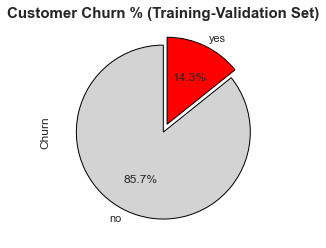

In [15]:
# Customer Churn as a % 

df['Churn'].value_counts().plot(kind='pie'
                                ,colors=['lightgrey','red']
                                ,wedgeprops={'edgecolor': 'black'}
                                ,explode=[0,0.1]
                                ,autopct='%1.1f%%'
                                ,startangle=90)
plt.title('Customer Churn % (Training-Validation Set)', size=15, fontweight='bold')
plt.show()

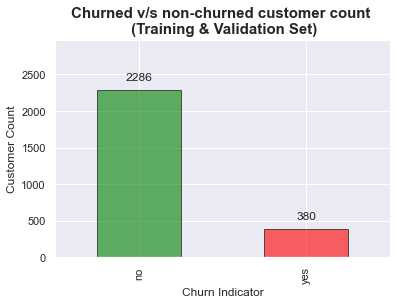

In [16]:
# Number of churned customers

color = ['green', 'red']

df['Churn'].value_counts().plot(kind='bar', alpha=0.6, color=color, edgecolor='black')

plt.title('Churned v/s non-churned customer count \n (Training & Validation Set)', size=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Churn Indicator')

plt.margins(0.3)

for x,y in enumerate(df['Churn'].value_counts()):

    label = "{:.0f}".format(y)

    plt.annotate(label
                 ,(x,y)
                 ,textcoords="offset points"
                 ,xytext=(0,10)
                 ,ha='center'
                ) 
plt.show()

In [17]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.475066,8.552493
yes,2.210526,4.786842


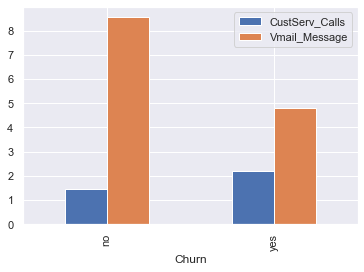

In [18]:
# Analyzing churned v/s non-churned customer differences

df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean().plot(kind='bar')

In [19]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.185263,13.872965
yes,1.832827,11.540194


In [20]:
# TO DO - make it mardown 




# Insights
    # It can be seen above that Churners place more customer 
    # service calls than non-churners, and leave fewer voice
    # mail messages.

In [21]:
# Veiwing churners and non-churners by state

df.groupby('State')['Churn'].value_counts()[['AL','CA','CO']]

State  Churn
AL     no       52
       yes       6
CA     no       18
       yes       8
CO     no       43
       yes       6
Name: Churn, dtype: int64

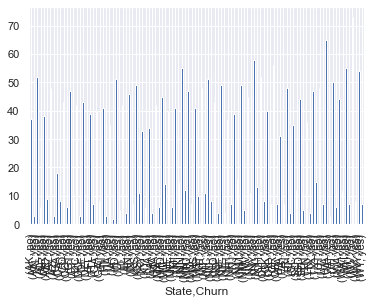

In [22]:
# TO DO - multiple bar to see churn and non-churn across different states





df.groupby('State')['Churn'].value_counts().plot(kind='bar')

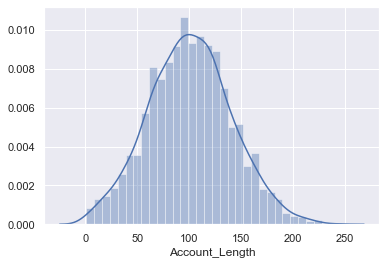

In [23]:
# Distribution of "Account_Length" feature

# plt.hist(df['Account_Length'], bins=25)
sns.distplot(df['Account_Length'])
plt.show()

In [24]:
# Insights
    # Illustrates the duration that a customer stays with the provider
    # is normally distribution (as what to expect in the real world)

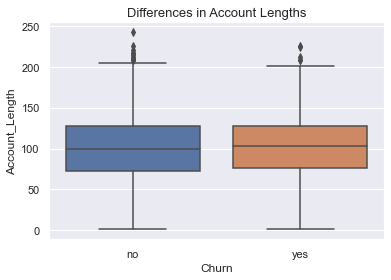

In [25]:
# Examining differences between churners and non-churners
# w.r.t their account lengths

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df)

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [26]:
# There are no notable differences in account lengths for
# churners v/s non-churners

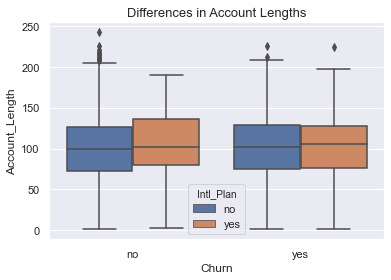

In [27]:
# Checking if having an international plan matters

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df,
            hue='Intl_Plan')

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [28]:
# Insights
    # No noticeable difference amoung customers with or
    # without an international plan

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

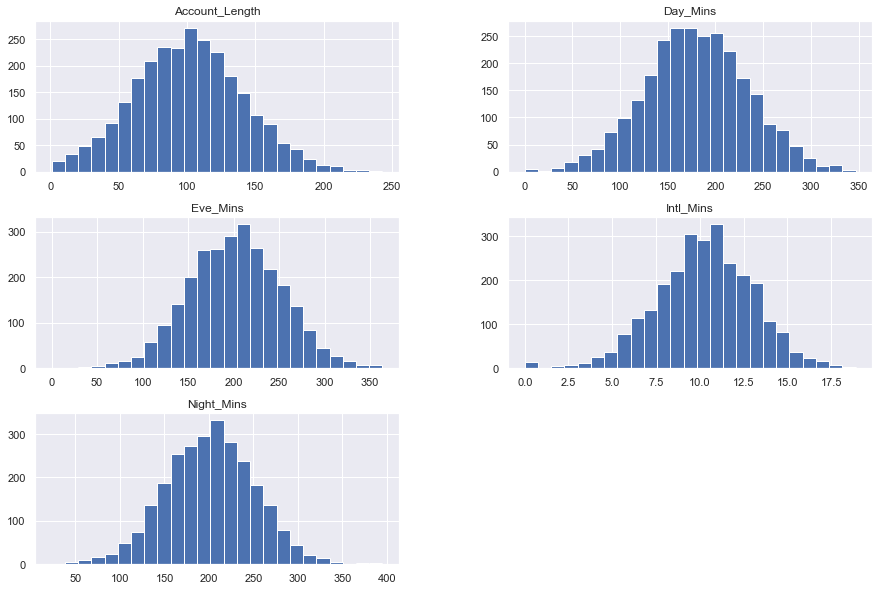

In [29]:
# Checking distribution of select features

df[['Account_Length', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']].hist(bins=25, figsize=(15,10))
plt.show()

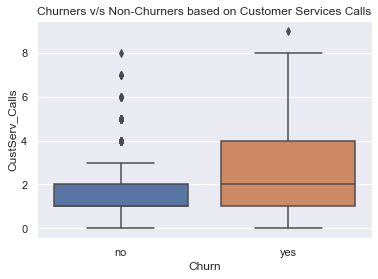

In [30]:
# Churn difference based on Customer Service Calls placed

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df)

plt.title('Churners v/s Non-Churners based on Customer Services Calls')
plt.show()

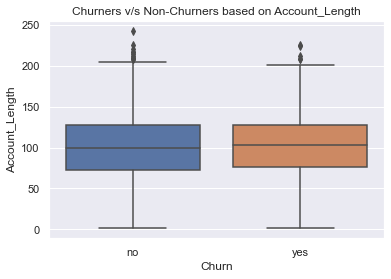

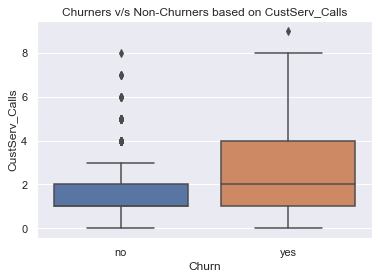

In [31]:
features = ['Account_Length', 'CustServ_Calls'] 

for feature in features:
    fig, axs = plt.subplots()
    fig = sns.boxplot(x = 'Churn',
                      y = feature,
                      data = df)
    plt.title('Churners v/s Non-Churners based on {}'.format(feature))

plt.show()

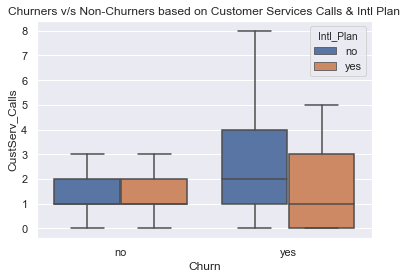

In [32]:
# Churn difference based on Customer Service Calls placed
# and being on an International Plan

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym='', # removing outliers from plot
            hue='Intl_Plan') 

plt.title('Churners v/s Non-Churners based on Customer Services Calls & Intl Plan')
plt.show()

In [33]:
# Insights:
    # Customers who leave more customer service calls churn more
    # unless they also have an international plan

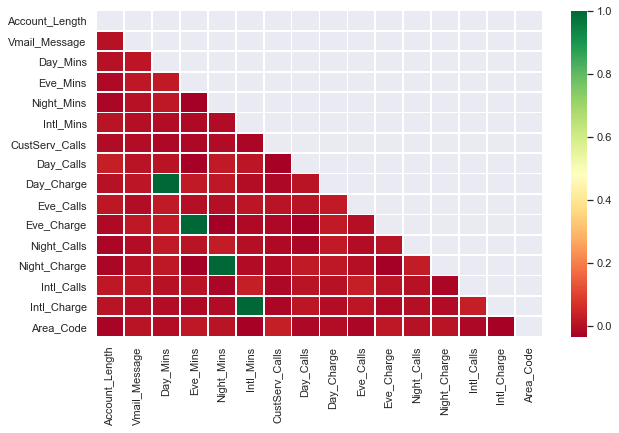

In [34]:
plt.figure(figsize=(10,6))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

In [35]:
# Since charges and mins are strongly correlated, we can either remove
# one of them, or feature engineer them to create 4 new charges_min
# and drop the charges and min columns subsequently.

---

<p><a name="prep"></a></p>

## Data Preprocessing

- Check missing values
- Checking distribution of features
- Encoding Categorical variables
- Feature Scaling via Standardization
- Feature Selection and Engineering

### Missing Values

In [36]:
# Missing values check

missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [37]:
# Examining data types 

# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 2032 to 399
Data columns (total 21 columns):
Account_Length    2666 non-null int64
Vmail_Message     2666 non-null int64
Day_Mins          2666 non-null float64
Eve_Mins          2666 non-null float64
Night_Mins        2666 non-null float64
Intl_Mins         2666 non-null float64
CustServ_Calls    2666 non-null int64
Intl_Plan         2666 non-null object
Vmail_Plan        2666 non-null object
Day_Calls         2666 non-null int64
Day_Charge        2666 non-null float64
Eve_Calls         2666 non-null int64
Eve_Charge        2666 non-null float64
Night_Calls       2666 non-null int64
Night_Charge      2666 non-null float64
Intl_Calls        2666 non-null int64
Intl_Charge       2666 non-null float64
State             2666 non-null object
Area_Code         2666 non-null int64
Phone             2666 non-null object
Churn             2666 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 538.2+ KB


In [38]:
#@ Unique values per column. 
#@@@@ use this to form continuous and discrete numerical variables

df.nunique()

Account_Length     209
Vmail_Message       44
Day_Mins          1503
Eve_Mins          1449
Night_Mins        1433
Intl_Mins          157
CustServ_Calls      10
Intl_Plan            2
Vmail_Plan           2
Day_Calls          116
Day_Charge        1503
Eve_Calls          117
Eve_Charge        1303
Night_Calls        118
Night_Charge       884
Intl_Calls          21
Intl_Charge        157
State               51
Area_Code            3
Phone             2666
Churn                2
dtype: int64

In [39]:
# Forming list of columns that are numerical and categorical

features_num = X_train_val.select_dtypes(include=['int64', 'float64']).columns
features_cat = X_train_val.select_dtypes(include=['object']).columns

In [40]:
print(features_num)
print('-'*80)
print(features_cat)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge', 'Area_Code'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], dtype='object')


In [41]:
X_train_val[features_num]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
2032,151,0,118.9,278.3,194.8,13.2,2,128,20.21,65,23.66,61,8.77,10,3.56,415
1889,91,0,153.0,141.1,171.5,10.3,1,123,26.01,127,11.99,76,7.72,15,2.78,415
2202,112,16,200.3,197.8,151.1,10.4,1,72,34.05,91,16.81,92,6.80,3,2.81,415
3193,88,0,113.7,165.1,141.5,10.8,1,67,19.33,127,14.03,142,6.37,3,2.92,415
2954,57,0,161.0,208.0,208.1,8.4,3,113,27.37,134,17.68,81,9.36,4,2.27,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,83,0,208.9,214.8,247.9,13.0,1,71,35.51,92,18.26,108,11.16,5,3.51,510
3178,91,0,190.5,205.5,130.7,13.8,0,128,32.39,103,17.47,63,5.88,5,3.73,415
294,96,18,172.7,133.4,259.5,9.8,1,86,29.36,113,11.34,70,11.68,3,2.65,510
1836,112,17,183.2,252.8,156.7,9.7,0,95,31.14,125,21.49,95,7.05,3,2.62,415


In [42]:
X_train_val[features_cat]

,Intl_Plan,Vmail_Plan,State,Phone
2032,no,no,NJ,399-3840
1889,no,no,SD,357-5696
2202,yes,yes,NE,351-2928
3193,no,no,IA,410-2015
2954,no,no,TX,403-6225
...,...,...,...,...
2978,no,no,UT,386-6114
3178,no,no,LA,382-6153
294,no,yes,WI,343-2605
1836,no,yes,MA,358-7379


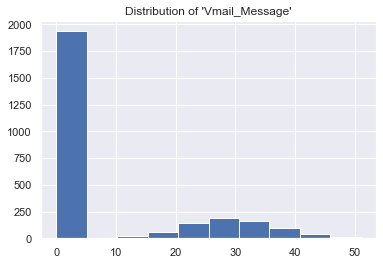

In [43]:
# Examining feature: 'Vmail_Message'

plt.hist(X_train_val['Vmail_Message'])

plt.title('Distribution of \'Vmail_Message\'')
plt.show()

**Insights**
- Since this feature has 0 as the most frequent value for most observations, I'll make this a candidate for a binary column (to be done in feature engineering)

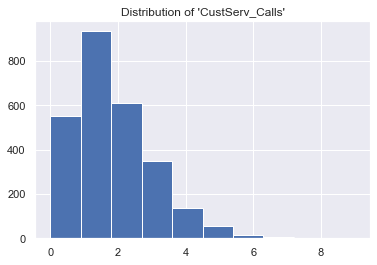

In [44]:
plt.hist(X_train_val['CustServ_Calls'])

plt.title('Distribution of \'CustServ_Calls\'')
plt.show()

### Encoding Target

In [45]:
# Instantiate Label Encoder for "Churn"

le = LabelEncoder()

In [46]:
y_train_val = le.fit_transform(y_train_val)

In [47]:
y_train_val

array([0, 1, 0, ..., 0, 0, 1])

### Train-Test Split

In [48]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 20) (667, 20) (1999,) (667,)


---

<p><a name="sel"></a></p>

### Feature Selection

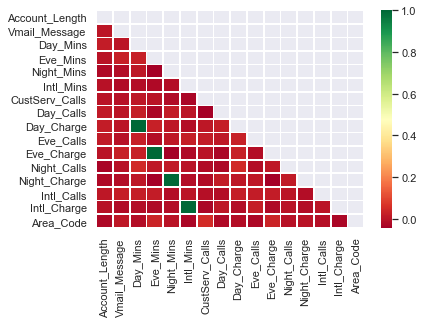

In [49]:
mask = np.zeros_like(X_train.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X_train.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

**Insights:**
- Following features are highly correlated
    - Day_Mins & Day_Charge
    - Eve_Mins & Eve_Charge
    - Night_Mins & Night_Charge
    - Intl_Mins & Intl_Charge
- Either set are candidates for being dropped or their combination for feature engineering

---

<p><a name="engg"></a></p>

### Feature Engineering

In [50]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    
    '''
    Descr:
    This class contains methods to undertake categorical transformations
    on features and its output will be used as CustomTransfomers 
    in the pipeline functionality to prevent data leakage and also
    automate categorical transformations on unseen data.
    
    Tasks performed by transform() method:
    1. Drops columns not required / provide no predictive information the model

    I/P:
    1. Features dataframe to perform transformation on
    2. Names of categorical features to be dropped

    O/P:
    numpy array of transformed categorical features
    '''    
    
    # Class constructor
    def __init__(self, drop_cat_features):
        self.drop_cat_features = drop_cat_features
    
    # fit method - does nothing and returns self
    def fit(self, X, y=None):
        return self
    
    # transform method for custom transformations
    def transform(self, X, y=None):
        
        # Doing this to avoid Chained Indexing error:
        # "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
        X1 = X.copy()
        
        # Dropping columns
        X1.drop(self.drop_cat_features, axis=1, inplace=True)

        # Return numpy array of transformed numerical features
        return X1 

In [51]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    
    '''
    Descr:
    This class contains methods to undertake numerical transformations
    on features and its output will be used as CustomTransfomers 
    in the pipeline functionality to prevent data leakage and also
    automate numerical transformations on unseen data.
    For it to qualify as a transformer, it will contain the .fit()
    and .transform() methods and we'll be inheriting from 2 classes
    that faciliate this class being a transformer.
    
    Tasks performed by transform() method:
    1. Drops columns not required / provide no predictive information the model
    2. Create binary column of features that are highly skewed to 1 value

    I/P:
    1. Features dataframe to perform transformation on
    2. Names of numerical features to be dropped
    3. Print flag to see names of columns after transformation. Defaulted
        to 'N' if not passed as 'Y'

    O/P:
    numpy array of transformed numerical features
    '''    
    
    # Class constructor
    def __init__(self, numerical_features, drop_num_features, my_print='N'):
        self.numerical_features = numerical_features
        self.drop_num_features = drop_num_features
        self.my_print = my_print
    
    # fit method - does nothing and returns self
    def fit(self, X, y=None):
        return self
    
    # Binarize method
    def binarize(self, obj):
        if obj == 0:
            return 0
        else:
            return 1

    
    # transform method for custom transformations
    def transform(self, X, y=None):
        
        X = pd.DataFrame(X, columns=self.numerical_features)
        
        # Doing this to avoid Chained Indexing error:
        # "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
        X1 = X.copy()
        
        # Binarize columns
        X1.loc[:,'Vmail_Message_b'] = X1['Vmail_Message'].apply(self.binarize)

        # Dropping columns
        X1.drop(self.drop_num_features, axis=1, inplace=True)

        if self.my_print == 'Y':
            print('Transformed Numerical Features\' column names:\n', list(X1.columns))
    
        # Return numpy array of transformed numerical features
        return X1    #X1.values

In [52]:
# Tagging features for transformations

# Lists of Categorical features:
# Features for (1) dropping 'Phone' (2) imputation (3) Ordinal encoding
features_for_pipe_cat_imp_oe = ['Intl_Plan', 'Vmail_Plan', 'Phone']
    
# Features for (1) imputation (2) OneHot encoding
features_for_ohe = ['State']

features_dropped_cat = ['Phone']


# Lists of Numerical features:
features_for_pipe_num_imp_ss = features_num

features_dropped_num = ['Day_Mins','Eve_Mins','Night_Mins','Intl_Mins',\
                        'Vmail_Message','Area_Code']

In [53]:
# Instantiate all transformers to be used in the 
# Column Transformer (i.e., Preprocessor)

# Categorical tranformers
cat_transformer = CategoricalTransformer(features_dropped_cat)
imp_mode_c = SimpleImputer(strategy='most_frequent')
oe = OrdinalEncoder()
ohe = OneHotEncoder()

# Numerical transformers
imp_median_n = SimpleImputer(strategy='median')
# Instantiate with 3rd argument 'Y' to see column names of tranformed features
num_transformer = NumericalTransformer(features_num, features_dropped_num, 'N')
ss = StandardScaler()

In [54]:
# Pipelines of transformations (no model yet)

# Categorical pipelines of transformations

# Pipeline for (1) dropping 'Phone' (2) imputation (3) Ordinal encoding
pipe_cat_imp_oe = make_pipeline(cat_transformer, imp_mode_c, oe)

# Pipeline for (1) imputation (2) OneHot encoding
pipe_imp_ohe = make_pipeline(imp_mode_c, ohe)


# Numerical pipelines of transformations
# Pipeline for (1) imputation (2) Numerical transformations (3) Standardizing


#@@@@@@@@@@@@@@ Uncomment below to run without standardizing data.
pipe_num_imp_ss = make_pipeline(imp_median_n, num_transformer)
# pipe_num_imp_ss = make_pipeline(imp_median_n, num_transformer, ss)




In [55]:
# Utilizing Column Transformer for transformations

preprocessor = make_column_transformer(
    (pipe_cat_imp_oe, features_for_pipe_cat_imp_oe)
    ,(pipe_imp_ohe, features_for_ohe)
    ,(pipe_num_imp_ss, features_for_pipe_num_imp_ss)
    ,remainder='passthrough') 

In [56]:
preprocessor.fit_transform(X_train)

<1999x64 sparse matrix of type '<class 'numpy.float64'>'
	with 22858 stored elements in Compressed Sparse Row format>

In [57]:
# Deriving the column names for the OneHot encoded 'State'

features_transformed_ohe = list(preprocessor.transformers_[1][1].named_steps['onehotencoder'].get_feature_names())

# Quick check
print('Number of OHE columns created from "State" = ', len(features_transformed_ohe))
print('Number of unique values in "State"         = ', churn_data['State'].nunique())

Number of OHE columns created from "State" =  51
Number of unique values in "State"         =  51


In [58]:
# Deriving the column names of the transformed df

# Leveraing feature names that were provided to the column
# transformer, output from ohe and the output of the numerical transformer
features_transformed_incl_dropped = features_for_pipe_cat_imp_oe + \
features_transformed_ohe + \
['Account_Length', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', \
 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', \
 'Intl_Calls', 'Intl_Charge', 'Vmail_Message_b']

# Leveraging feature names provided as input to the dropped
features_dropped_all = features_dropped_cat + features_dropped_num


# Forming a list of transformed features by removing dropped 
# columns from the list
features_transformed = [col for col in features_transformed_incl_dropped if col not in features_dropped_all]

In [59]:
# Check the transformed features column name count
# versus the shape of the transformed array

print('\n# columns from transformation =', preprocessor.fit_transform(X_train).toarray().shape[1])
print('# column names derived        =', len(features_transformed))


# columns from transformation = 64
# column names derived        = 64


In [60]:
# Forming transformed DF with transformed features

X_train_tf = pd.DataFrame(preprocessor.fit_transform(X_train).toarray(), columns=features_transformed)
X_train_tf.head()

,Intl_Plan,Vmail_Plan,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,...,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Vmail_Message_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,132.0,40.05,129.0,9.85,136.0,8.34,2.0,4.37,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,100.0,23.58,58.0,18.31,98.0,7.39,4.0,1.32,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,71.0,21.96,68.0,18.20,100.0,9.67,4.0,2.78,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,116.0,41.79,91.0,24.37,115.0,10.83,13.0,2.43,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,92.0,26.11,88.0,17.47,89.0,5.15,10.0,3.38,0.0


---

#### ML Models

In [61]:
# Instantiate ML Model

logreg = LogisticRegression()

#### Pipeline

In [62]:
# Make pipeline of all transformation and Logistic model

pipe = make_pipeline(preprocessor, logreg)

In [63]:
pipe.fit(X_train, y_train);

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
y_pred = pipe.predict(X_test)

In [65]:
y_pred_proba = pipe.predict_proba(X_test)
y_pred_proba

array([[0.81768176, 0.18231824],
       [0.61384834, 0.38615166],
       [0.93071956, 0.06928044],
       ...,
       [0.86155868, 0.13844132],
       [0.82919462, 0.17080538],
       [0.93100132, 0.06899868]])

#### Model Evaluation

In [66]:
# Confusion matrix as this is a imbalanced dataset

confusion_matrix(y_test, y_pred)

array([[552,  14],
       [ 92,   9]])

In [67]:
print('Precision = {0:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall    = {0:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score  = {0:.2f}%'.format(f1_score(y_test, y_pred)*100))

Precision = 39.13%
Recall    = 8.91%
F1 Score  = 14.52%


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       566
           1       0.39      0.09      0.15       101

    accuracy                           0.84       667
   macro avg       0.62      0.53      0.53       667
weighted avg       0.79      0.84      0.80       667



In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

roc_df = pd.DataFrame({'FPR': fpr, 'TPR':tpr, 'Thresholds':thresholds})
roc_df.head()

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.824943
1,0.001767,0.000000,0.824943
2,0.003534,0.000000,0.699141
3,0.003534,0.029703,0.666151
4,0.005300,0.029703,0.657266


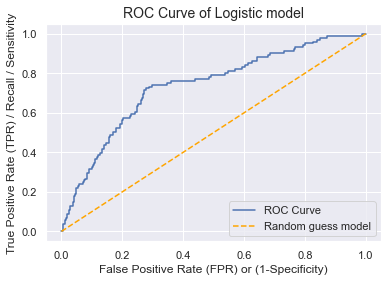

In [70]:
# Plotting the ROC curve

plt.plot(fpr, tpr, label='ROC Curve')

plt.ylabel('True Positive Rate (TPR) / Recall / Sensitivity')
plt.xlabel('False Positive Rate (FPR) or (1-Specificity)')
plt.title('ROC Curve of Logistic model', size=14)

# plot diagonal that illustrates model that randomly guesses
plt.plot([0,1],[0,1], linestyle='--', color='orange', label='Random guess model')

plt.legend(loc='lower right')
plt.show()

In [71]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.7350523038169542

---

<p><a name="hyp"></a></p>

## Hyperparameter Tuning

In [72]:
params = {}
params['logisticregression__C'] = [0.1, 1, 10, 100]
params['logisticregression__solver'] = ['liblinear'] #['lbfgs', 'liblinear']
params['logisticregression__max_iter'] = [100,1000,10000]
params

{'logisticregression__C': [0.1, 1, 10, 100],
 'logisticregression__solver': ['liblinear'],
 'logisticregression__max_iter': [100, 1000, 10000]}

In [73]:
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train);

In [74]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.033384,0.000822,0.010195,0.000780,100,100,liblinear,"{'logisticregression__C': 100, 'logisticregres...",0.8300,0.8575,0.8975,0.8675,0.874687,0.865437,0.022075,1
10,0.033001,0.000726,0.009861,0.000168,100,1000,liblinear,"{'logisticregression__C': 100, 'logisticregres...",0.8300,0.8575,0.8975,0.8675,0.874687,0.865437,0.022075,1
11,0.034449,0.002544,0.009916,0.000325,100,10000,liblinear,"{'logisticregression__C': 100, 'logisticregres...",0.8300,0.8575,0.8975,0.8675,0.874687,0.865437,0.022075,1
6,0.033353,0.000983,0.010283,0.000427,10,100,liblinear,"{'logisticregression__C': 10, 'logisticregress...",0.8325,0.8575,0.8875,0.8675,0.877193,0.864439,0.018826,4
7,0.033847,0.000932,0.010020,0.000111,10,1000,liblinear,"{'logisticregression__C': 10, 'logisticregress...",0.8325,0.8575,0.8875,0.8675,0.877193,0.864439,0.018826,4


In [75]:
grid.best_score_

0.865437343358396

In [76]:
grid.best_params_

{'logisticregression__C': 100,
 'logisticregression__max_iter': 100,
 'logisticregression__solver': 'liblinear'}

---

### Feature Selection

In [77]:
# To understand feature selection with a smaller subset of columns
# I'm going to removed state and then use the column transformer
# to preprocess features so that they can be worked on


# TO DO:
    # Can feature selection happen BEFORE you preprocess data??
    # How to handle OHE variables with feature selection
    # How to get the column names of preprocessed features???
    # How to incorporate feature selection techinques within pipelines??








In [78]:
def select_features(X_train, y_train): #@, X_test):
    fs = SelectKBest(score_func=chi2, k=5)#'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    return X_train, fs

In [79]:
X_train_fs, fs = select_features(X_train_tf, y_train)

In [80]:
X_train_fs

,Intl_Plan,Vmail_Plan,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,...,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Vmail_Message_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,132.0,40.05,129.0,9.85,136.0,8.34,2.0,4.37,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,100.0,23.58,58.0,18.31,98.0,7.39,4.0,1.32,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,71.0,21.96,68.0,18.20,100.0,9.67,4.0,2.78,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,116.0,41.79,91.0,24.37,115.0,10.83,13.0,2.43,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,92.0,26.11,88.0,17.47,89.0,5.15,10.0,3.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,145.0,25.98,102.0,15.61,75.0,6.83,2.0,2.84,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,92.0,34.03,87.0,10.09,65.0,10.65,6.0,1.62,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,147.0,39.13,121.0,15.87,100.0,5.78,3.0,2.48,0.0
1997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,107.0,40.61,88.0,15.91,84.0,8.15,3.0,3.19,0.0


In [81]:
best5 = SelectKBest(chi2, k=5).fit_transform(X_train_tf, y_train)
best5.shape

(1999, 5)

In [82]:
best5[:5]

array([[  0.  ,  24.  ,   0.  ,  40.05,   9.85],
       [  0.  , 104.  ,   2.  ,  23.58,  18.31],
       [  0.  ,  89.  ,   5.  ,  21.96,  18.2 ],
       [  0.  , 145.  ,   1.  ,  41.79,  24.37],
       [  0.  ,  59.  ,   1.  ,  26.11,  17.47]])

In [83]:
X_train_tf.head()

,Intl_Plan,Vmail_Plan,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,...,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Vmail_Message_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,132.0,40.05,129.0,9.85,136.0,8.34,2.0,4.37,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,100.0,23.58,58.0,18.31,98.0,7.39,4.0,1.32,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,71.0,21.96,68.0,18.20,100.0,9.67,4.0,2.78,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,116.0,41.79,91.0,24.37,115.0,10.83,13.0,2.43,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,92.0,26.11,88.0,17.47,89.0,5.15,10.0,3.38,0.0


### Feature Selection-2

In [130]:
# Selecting all columns that are not State OHE for feature selection

X_train_tf_non_state = X_train_tf[X_train_tf.columns[~X_train_tf.columns.str.startswith('x0')]]
X_train_tf_non_state.head()

,Intl_Plan,Vmail_Plan,Account_Length,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Vmail_Message_b
0,0.0,0.0,24.0,0.0,132.0,40.05,129.0,9.85,136.0,8.34,2.0,4.37,0.0
1,0.0,0.0,104.0,2.0,100.0,23.58,58.0,18.31,98.0,7.39,4.0,1.32,0.0
2,0.0,0.0,89.0,5.0,71.0,21.96,68.0,18.20,100.0,9.67,4.0,2.78,0.0
3,0.0,0.0,145.0,1.0,116.0,41.79,91.0,24.37,115.0,10.83,13.0,2.43,0.0
4,0.0,0.0,59.0,1.0,92.0,26.11,88.0,17.47,89.0,5.15,10.0,3.38,0.0


In [140]:
features_for_chi2_fs = ['Intl_Plan', 'Vmail_Plan', 'Account_Length', 'Vmail_Message_b', 'CustServ_Calls']

In [147]:
bestk = SelectKBest(score_func=chi2, k='all')
bestk

SelectKBest(k='all', score_func=<function chi2 at 0x7ff2796b9050>)

In [148]:
bestk.fit(X_train_tf[features_for_chi2_fs], y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7ff2796b9050>)

In [149]:
bestk.pvalues_

array([3.88488129e-34, 3.92156363e-05, 4.05685751e-06, 3.92156363e-05,
       7.37115204e-21])

In [151]:
# All the preselected features for feature selection seem important based on
# their low p-values (<0.05)
pd.DataFrame(zip(X_train_tf[features_for_chi2_fs], bestk.pvalues_), columns=['Features','pvalues'])

,Features,pvalues
0,Intl_Plan,3.884881e-34
1,Vmail_Plan,3.921564e-05
2,Account_Length,4.056858e-06
3,Vmail_Message_b,3.921564e-05
4,CustServ_Calls,7.371152e-21


#### f_classif

In [ ]:
# Not much point there.... Let's try:
# 1. f_classif -- requires the entities used to be normally distribution and is sensitive to this. So ignore for now.
# 2 RFE 
# to close out Features Selection.

#### RFE

In [153]:
rfe = RFE(logreg, step=1)
rfe

RFE(estimator=LogisticRegression())

In [154]:
rfe.fit(X_train_tf, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RFE(estimator=LogisticRegression())

In [155]:
rfe.ranking_

array([ 1,  1,  1,  1, 30,  1,  1, 22,  1, 14,  5,  1,  9,  1,  1, 24,  1,
       27,  1,  6, 17, 26, 15,  1,  1,  1, 11,  3,  1, 21,  1,  1,  1,  1,
        1, 32,  1, 19,  7, 18, 31,  1,  1, 10, 29,  1,  1,  1,  1,  1,  8,
        1,  2, 33,  1, 25, 13, 20, 28, 23, 16, 12,  4,  1])

In [158]:
rfe_ranking = pd.DataFrame({'Features':X_train_tf.columns, 'RFE_Rank':rfe.ranking_}).sort_values(by='RFE_Rank')
rfe_ranking[rfe_ranking['RFE_Rank']==1]

,Features,RFE_Rank
0,Intl_Plan,1
25,x0_MN,1
28,x0_MT,1
30,x0_ND,1
32,x0_NH,1
33,x0_NJ,1
34,x0_NM,1
36,x0_NY,1
24,x0_MI,1
41,x0_RI,1


In [159]:
rfe.fit(X_train_tf_non_state, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RFE(estimator=LogisticRegression())

In [160]:
rfe.ranking_

array([1, 1, 8, 1, 7, 2, 5, 6, 4, 3, 1, 1, 1])

In [162]:
rfe_ranking = pd.DataFrame({'Features':X_train_tf_non_state.columns, 'RFE_Rank':rfe.ranking_}).sort_values(by='RFE_Rank')
rfe_ranking
# rfe_ranking[rfe_ranking['RFE_Rank']==1]

,Features,RFE_Rank
0,Intl_Plan,1
1,Vmail_Plan,1
3,CustServ_Calls,1
10,Intl_Calls,1
11,Intl_Charge,1
12,Vmail_Message_b,1
5,Day_Charge,2
9,Night_Charge,3
8,Night_Calls,4
6,Eve_Calls,5


---

In [84]:
# See variable selection from Datacamp logistic regression








# Rough

In [90]:
features_cat

Index(['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], dtype='object')

In [117]:
X_train[features_num].head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
2796,24,0,235.6,115.9,185.4,16.2,0,132,40.05,129,9.85,136,8.34,2,4.37,415
2650,104,0,138.7,215.4,164.3,4.9,2,100,23.58,58,18.31,98,7.39,4,1.32,415
2827,89,0,129.2,214.1,214.9,10.3,5,71,21.96,68,18.20,100,9.67,4,2.78,510
2947,145,0,245.8,286.7,240.7,9.0,1,116,41.79,91,24.37,115,10.83,13,2.43,415
1772,59,0,153.6,205.5,114.5,12.5,1,92,26.11,88,17.47,89,5.15,10,3.38,510


In [91]:
X_train[features_cat]

,Intl_Plan,Vmail_Plan,State,Phone
2796,no,no,HI,329-8788
2650,no,no,WY,365-6022
2827,no,no,AL,347-2016
2947,no,no,ND,378-1936
1772,no,no,CO,331-3842
...,...,...,...,...
3039,no,no,DC,345-8397
2636,no,no,SD,406-2678
967,no,no,WV,417-5320
2216,no,no,AR,389-6082


In [99]:
churn_data['Intl_Plan'].map({'no':0, 'yes':1})
churn_data['Churn'].map({'no':0, 'yes':1})

crosstab = pd.crosstab(churn_data['Intl_Plan'].map({'no':0, 'yes':1}), churn_data['Churn'].map({'no':0, 'yes':1}))

In [100]:
crosstab

Churn,0,1
Intl_Plan,,
0,2664,346
1,186,137


In [102]:
chi2_contingency(crosstab)

(222.5657566499376,
 2.4931077033159556e-50,
 1,
 array([[2573.80738074,  436.19261926],
        [ 276.19261926,   46.80738074]]))

In [104]:
crosstab2 = pd.crosstab(churn_data['Vmail_Plan'].map({'no':0, 'yes':1}), churn_data['Churn'].map({'no':0, 'yes':1}))

In [105]:
chi2_contingency(crosstab2)

(34.13166001075673,
 5.15063965903898e-09,
 1,
 array([[2061.61116112,  349.38883888],
        [ 788.38883888,  133.61116112]]))

In [111]:
# Creating a small df with 2 categorical and 1 target to test 
# if Intl_Plan is returned by SelectKBest when I use k=1
# Intl_Plan has a smaller p-value

temp_chi2_df = pd.DataFrame({'Intl' : churn_data['Intl_Plan'].map({'no':0, 'yes':1}),\
                             'Vmail': churn_data['Vmail_Plan'].map({'no':0, 'yes':1}),\
                             'Churn': churn_data['Churn'].map({'no':0, 'yes':1})})


temp_chi2_df

,Intl,Vmail,Churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3328,0,1,0
3329,0,0,0
3330,0,0,0
3331,1,0,0


In [115]:
SelectKBest(score_func=chi2, k=1).fit_transform(temp_chi2_df[['Intl', 'Vmail']], temp_chi2_df['Churn'])

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

---